# Random Forest

- A random forest is a machine learning algorithm that combines the output of multiple decision trees to reach a single result.
- Used for both classification and regression problems
- Robost to outliers by effectively using outlier detection
  - Each decision tree only considers a subset of features and instances, so outliers have less impact on the model's overall performance.
- Leverages the power of multiple decision trees by introducing randomness in the training process, which results in a more robust and accurate model
  - Bootstrap Sampling: Each tree is trained on a random subset of the training data, sampled with replacement data. This means that some data points may be repeated in a subset, while others may be left out
  - Random Feature Selection: When splitting a node, each tree considers a random subset of the features rather than all features.

<img src="random-forest.png" width="500"/>

## Example:
- Scenario: Predicting whether someone will buy a product based on age, income, and education level
- Tree Split: Trees are trained on separate data that is randomly sampled
- Random Feature Selection: For each node split, a random subset of features is selected.
   - The first tree might split on age and income
   - The second tree might split on income and education level
   - The third tree might split on age and education level
- Result:
   - If tree 1 and tree 2 predicts yes and tree 3 predicts no, the random forest will predict Yes for this person

### Research Question:
Can the business predict monthly charges for telecommunication customers?
- The goal is to develop a random forest model that uses regression to help the company predict their customer's monthly cost.
- Understanding how the company can tune spending will help get the best recommendation for a course of action.
- A random forest is being used instead of decision trees because it is a combination of multiple predictions that will improve accuracy and reduce overfitting..
   - Overfitting: The model learns underlying patterns in the training data, but also includes noise and outliers, which could impact the results of the model
        - This results in the model predicting the training set accurately, but when using new data, it's unable to generalize the patterns

### Data
- **Churn:** Defined as the percentage of customers who stopped using a provider's product or service during a certain time frame
- The data set includes information about the following:
     - Customers who left within the last month
     - Services that each customer signed up for
     - Customer account information
     - Customer demographics
- In the data set, there are also **item#** columns that contain information from a scale of 1 to 8 (1 = most important, 8 = least important)
     - Item1: Timely response
     - Item2: Timely fixes
     - Item3: Timely replacements
     - Item4: Reliability
     - Item5: Options
     - Item6: Respectful response
     - Item7: Courteous exchange
     - Item8: Evidence of active listening

### Import Data

In [197]:
import pandas as pd

df = pd.read_csv('Datasets/churn_clean.csv')

In [198]:
pd.options.display.max_columns = None

In [199]:
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

# Data Preprocessing
- Replace null values
- Handle outliers
- Encode variables
- Correlation between variables

### Replace Null Values

##### Python interprets 'None' as a null value when it's being read in but for this data, 'None' makes sense

In [202]:
df['InternetService'].value_counts()

InternetService
Fiber Optic    4408
DSL            3463
None           2129
Name: count, dtype: int64

In [201]:
import warnings
warnings.filterwarnings("ignore")
df['InternetService'].fillna('None', inplace=True)

### Breaking the columns down
- **Possible Outliers:** Columns with number as a data type
- **High Cardinality:** Columns like IDs or categories that won't allow us to generalize a pattern
- **Needs Encoding:** Columns that have low cardinality and needs encoding for the model
- **Good to Go:** Columns that have a numeric data type but won't have outliers due to being a scale

In [203]:
#make lists of data types.  check numeric for outliers, objects for encoding & cardinality
possibleoutliers = df[['Lat','Lng','Population','Children', 'Age','Income','Outage_sec_perweek',
                       'Email','Contacts','Yearly_equip_failure','Tenure','MonthlyCharge','Bandwidth_GB_Year']]
highcardinality = df[['CaseOrder','Customer_id','Interaction','UID','City','State','County','Zip','TimeZone','Job']]
needsencoding = df[['Area','Marital','Gender','Churn','Techie','Contract','Port_modem','Tablet','InternetService',
                    'Phone','Multiple','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
                    'StreamingMovies','PaperlessBilling','PaymentMethod']]
goodtogo = df[['Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8']]

**Since the info function returned all non-nulls, we need to ensure there isn't another value that represents 'null' (ex: 0)**
- Population: Population within a mile radius of customer, based on census data
- Children: Number of children in customer's household as reported in sign-up information
- Contacts: Number of times customer contacted technical support
- Yearly_equip_failure: The number of times customer's equipement failed and had to be reset/replaced in the past year

In [204]:
df.isin([0]).sum()

CaseOrder                  0
Customer_id                0
Interaction                0
UID                        0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                97
Area                       0
TimeZone                   0
Job                        0
Children                2570
Age                        0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                3680
Yearly_equip_failure    6727
Techie                     0
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                      0
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport   

We can handle the 0 values with nan for `Population` by doing so:

<Axes: >

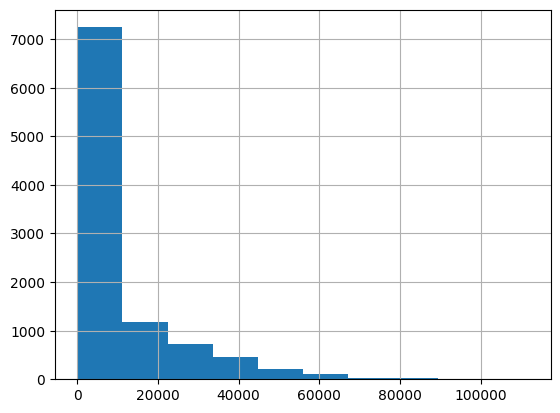

In [205]:
df['Population'].hist()

**Replace null values in `Population` with the median since there is a right skew in the distribution**

In [206]:
#treat NaNs
df.Population.replace(0, df['Population'].median(), inplace=True)


In [207]:
#check for null placeholders like -1
df.isin([-1]).sum() #no missingness

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [208]:
#check for null placeholders '?', 'N/A'
for col in df:
    if df[col].dtype.name == 'object' and df[col].nunique() < 10000:
        print(df[col].value_counts()) 
        #no other missingness detected
        #not checking unique columns for missingness because they will be omitted anyway.


City
Houston         34
New York        24
Springfield     23
Buffalo         23
San Antonio     22
                ..
Cottontown       1
San Dimas        1
Fort Hill        1
Webster          1
Clarkesville     1
Name: count, Length: 6058, dtype: int64
State
TX    603
NY    558
PA    550
CA    526
IL    413
OH    359
FL    324
MO    310
VA    285
NC    280
IA    279
MI    279
MN    264
WV    247
IN    241
GA    238
KY    238
WI    228
OK    203
KS    195
NJ    190
TN    185
AL    181
NE    181
AR    176
WA    175
MA    172
CO    155
LA    141
MS    126
SC    124
MD    123
ND    118
NM    114
OR    114
AZ    112
ME    112
SD    101
MT     96
NH     85
VT     84
ID     81
AK     77
CT     71
UT     66
NV     48
WY     43
PR     40
HI     35
DE     21
RI     19
DC     14
Name: count, dtype: int64
County
Washington     111
Jefferson      100
Montgomery      99
Franklin        92
Los Angeles     91
              ... 
Rooks            1
Cochise          1
Yauco            1
Hoke            

### Outliers in numerical variables
- This process is standard in EDA, however, since the random forest analysis is robust to outliers, we don't have to remove them.

In [209]:
#check for outliers with describe
possibleoutliers.describe(percentiles=[.01, .05, .1, .25, .5, .75, .90, .95, .99]) 

,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550
std,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852
min,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715
1%,25.960625,-143.749576,4.000000,0.0000,18.000000,3174.911600,3.015347,5.000000,0.000000,0.000000,1.338371,92.455140,389.104774
5%,29.725587,-121.149900,102.950000,0.0000,21.000000,7503.760500,5.099282,7.000000,0.000000,0.000000,2.368222,112.455100,628.740407
10%,31.854840,-115.239730,211.000000,0.0000,25.000000,10933.561000,6.164412,8.000000,0.000000,0.000000,3.677483,119.712645,812.261821
25%,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370


### Boxplots to visualize outliers

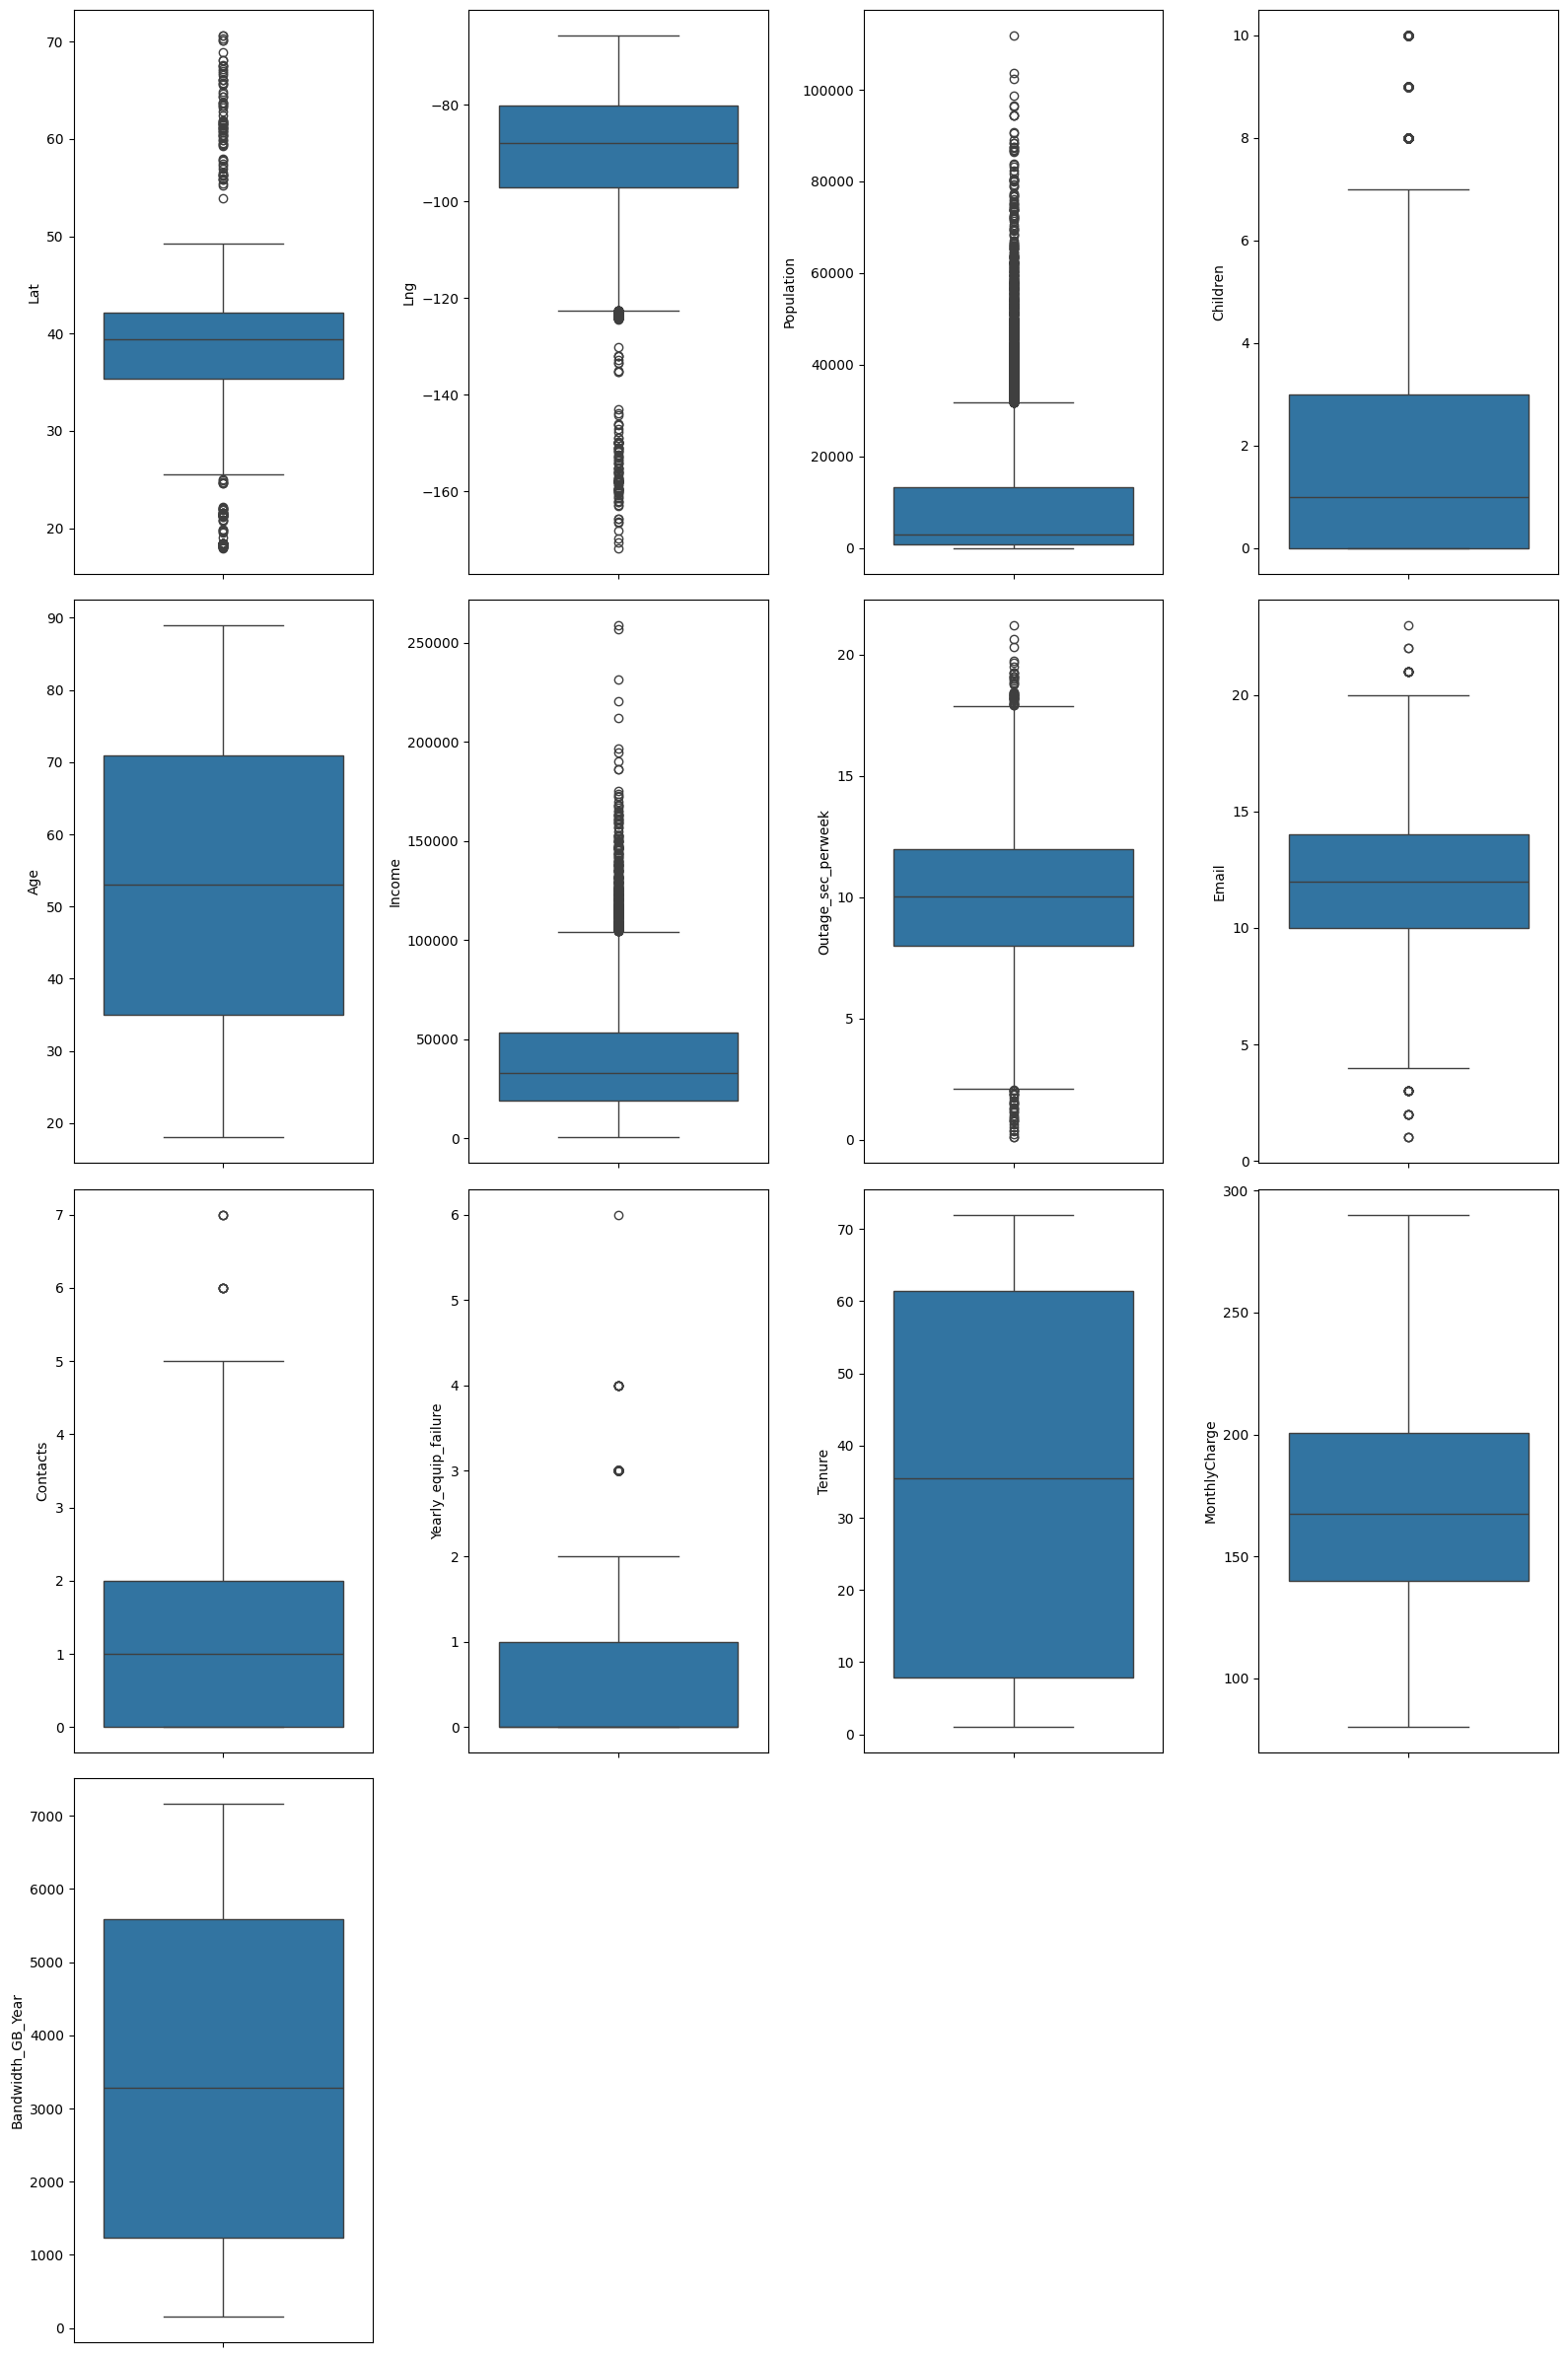

In [210]:
import matplotlib.pyplot as plt #figures, subplots
import seaborn as sns #boxplots, heatmap


#visualize boxplots for possible outliers
plt.figure(figsize=(16,24))

for i,col in enumerate(possibleoutliers.columns.tolist()):    
    plt.subplot(4,4,i + 1)
    sns.boxplot(y=col, data=df)


plt.tight_layout()

plt.show()

### Cardinality in categorical variables
- **Curse of Dimensionality:** As more dimensions are added to the dataset, the volume of the space increases exponentionally, making data sparse.
     - This leads to data sparsity, making clustering and classification more challenging
     - It can cause overfitting, making the model overly complex, fitting to noise

**Print how many unique categories exist for each column**
- All of these columns have high cardinality, so they should be dropped from the dataset

In [211]:
#evaluation of 'highcardinality'
for col in highcardinality:
    print(highcardinality[col].name)
    print(highcardinality[col].nunique())

CaseOrder
10000
Customer_id
10000
Interaction
10000
UID
10000
City
6058
State
52
County
1620
Zip
8583
TimeZone
25
Job
639


**We can confirm that there is low cardinality in all of these columns, so they should be kept in the dataset**

In [183]:
#evaluation of 'needsencoding'
for col in needsencoding:
    print(needsencoding[col].name)
    print(needsencoding[col].nunique())
    print(needsencoding[col].unique())
#all of these have low enough dimensionality to use either binary or dummy encoding

Area
3
['Urban' 'Suburban' 'Rural']
Marital
5
['Widowed' 'Married' 'Separated' 'Never Married' 'Divorced']
Gender
3
['Male' 'Female' 'Nonbinary']
Churn
2
['No' 'Yes']
Techie
2
['No' 'Yes']
Contract
3
['One year' 'Month-to-month' 'Two Year']
Port_modem
2
['Yes' 'No']
Tablet
2
['Yes' 'No']
InternetService
3
['Fiber Optic' 'DSL' 'None']
Phone
2
['Yes' 'No']
Multiple
2
['No' 'Yes']
OnlineSecurity
2
['Yes' 'No']
OnlineBackup
2
['Yes' 'No']
DeviceProtection
2
['No' 'Yes']
TechSupport
2
['No' 'Yes']
StreamingTV
2
['No' 'Yes']
StreamingMovies
2
['Yes' 'No']
PaperlessBilling
2
['Yes' 'No']
PaymentMethod
4
['Credit Card (automatic)' 'Bank Transfer(automatic)' 'Mailed Check'
 'Electronic Check']


### Variable Encoding

**Binary Encoding**

In [212]:
for col in df:
    if df[col].dtype.name == 'object' and df[col].nunique() == 2:
        df[col] = df[col].map({'Yes': 1, 'No': 0})


In [213]:
df['Churn'].value_counts()

Churn
0    7350
1    2650
Name: count, dtype: int64

**Dummy Encoding**
- Drop_first = True: We can use this since we can imply whether a variable exists or does not exist from the other dummy variables
    - Ex: Gender has Male, Female, Unknown
    - Splitting these into dummy variables, we'll get gender_male, gender_female, and gender_unknown
    - If Gender originally had 'Male' then gender_male will be 1 for that row, gender_female will be 0 and gender_unknown will be 0
    - If gender_female and gender_unknown are both 0, then we can imply that gender_male is 1 (since we don't have null values), therefore, we can drop gender_male completely from our dataset to reduce the number of features we'll feed into our model and reduce overfitting.

In [214]:
df = pd.get_dummies(df, columns=["Area", "Marital", "Gender", "Contract", "InternetService","PaymentMethod"], 
                    prefix=["Area", "Marital", "Gender", "Contract", "Internet","Payment"], drop_first=True)  
# drop first: used to prevent multicollinearity (can predict the dummy variable based on the others)

In [215]:
df['Area_Suburban']

0       False
1       False
2       False
3        True
4        True
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Area_Suburban, Length: 10000, dtype: bool

In [216]:
df = df.replace({True: 1, False: 0})

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 59 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   CaseOrder                        10000 non-null  int64  
 1   Customer_id                      10000 non-null  object 
 2   Interaction                      10000 non-null  object 
 3   UID                              10000 non-null  object 
 4   City                             10000 non-null  object 
 5   State                            10000 non-null  object 
 6   County                           10000 non-null  object 
 7   Zip                              10000 non-null  int64  
 8   Lat                              10000 non-null  float64
 9   Lng                              10000 non-null  float64
 10  Population                       10000 non-null  float64
 11  TimeZone                         10000 non-null  object 
 12  Job                

In [218]:
df = df.drop(['CaseOrder','Customer_id','Interaction','UID','City','State','County','TimeZone','Job', 'Zip'], axis = 1)

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lat                              10000 non-null  float64
 1   Lng                              10000 non-null  float64
 2   Population                       10000 non-null  float64
 3   Children                         10000 non-null  int64  
 4   Age                              10000 non-null  int64  
 5   Income                           10000 non-null  float64
 6   Churn                            10000 non-null  int64  
 7   Outage_sec_perweek               10000 non-null  float64
 8   Email                            10000 non-null  int64  
 9   Contacts                         10000 non-null  int64  
 10  Yearly_equip_failure             10000 non-null  int64  
 11  Techie                           10000 non-null  int64  
 12  Port_modem         

# Correlation between variables

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5, 45.5, 46.5, 47.5, 48.5]),
 [Text(0.5, 0, 'Lat'),
  Text(1.5, 0, 'Lng'),
  Text(2.5, 0, 'Population'),
  Text(3.5, 0, 'Children'),
  Text(4.5, 0, 'Age'),
  Text(5.5, 0, 'Income'),
  Text(6.5, 0, 'Churn'),
  Text(7.5, 0, 'Outage_sec_perweek'),
  Text(8.5, 0, 'Email'),
  Text(9.5, 0, 'Contacts'),
  Text(10.5, 0, 'Yearly_equip_failure'),
  Text(11.5, 0, 'Techie'),
  Text(12.5, 0, 'Port_modem'),
  Text(13.5, 0, 'Tablet'),
  Text(14.5, 0, 'Phone'),
  Text(15.5, 0, 'Multiple'),
  Text(16.5, 0, 'OnlineSecurity'),
  Text(17.5, 0, 'OnlineBackup'),
  Text(18.5, 0, 'DeviceProtection'),
  Text(19.5, 0, 'TechSupport'),
  Text(20.5, 0, 'StreamingTV'),
  Text(21.5, 0, 'StreamingMovies'),
  Text(22

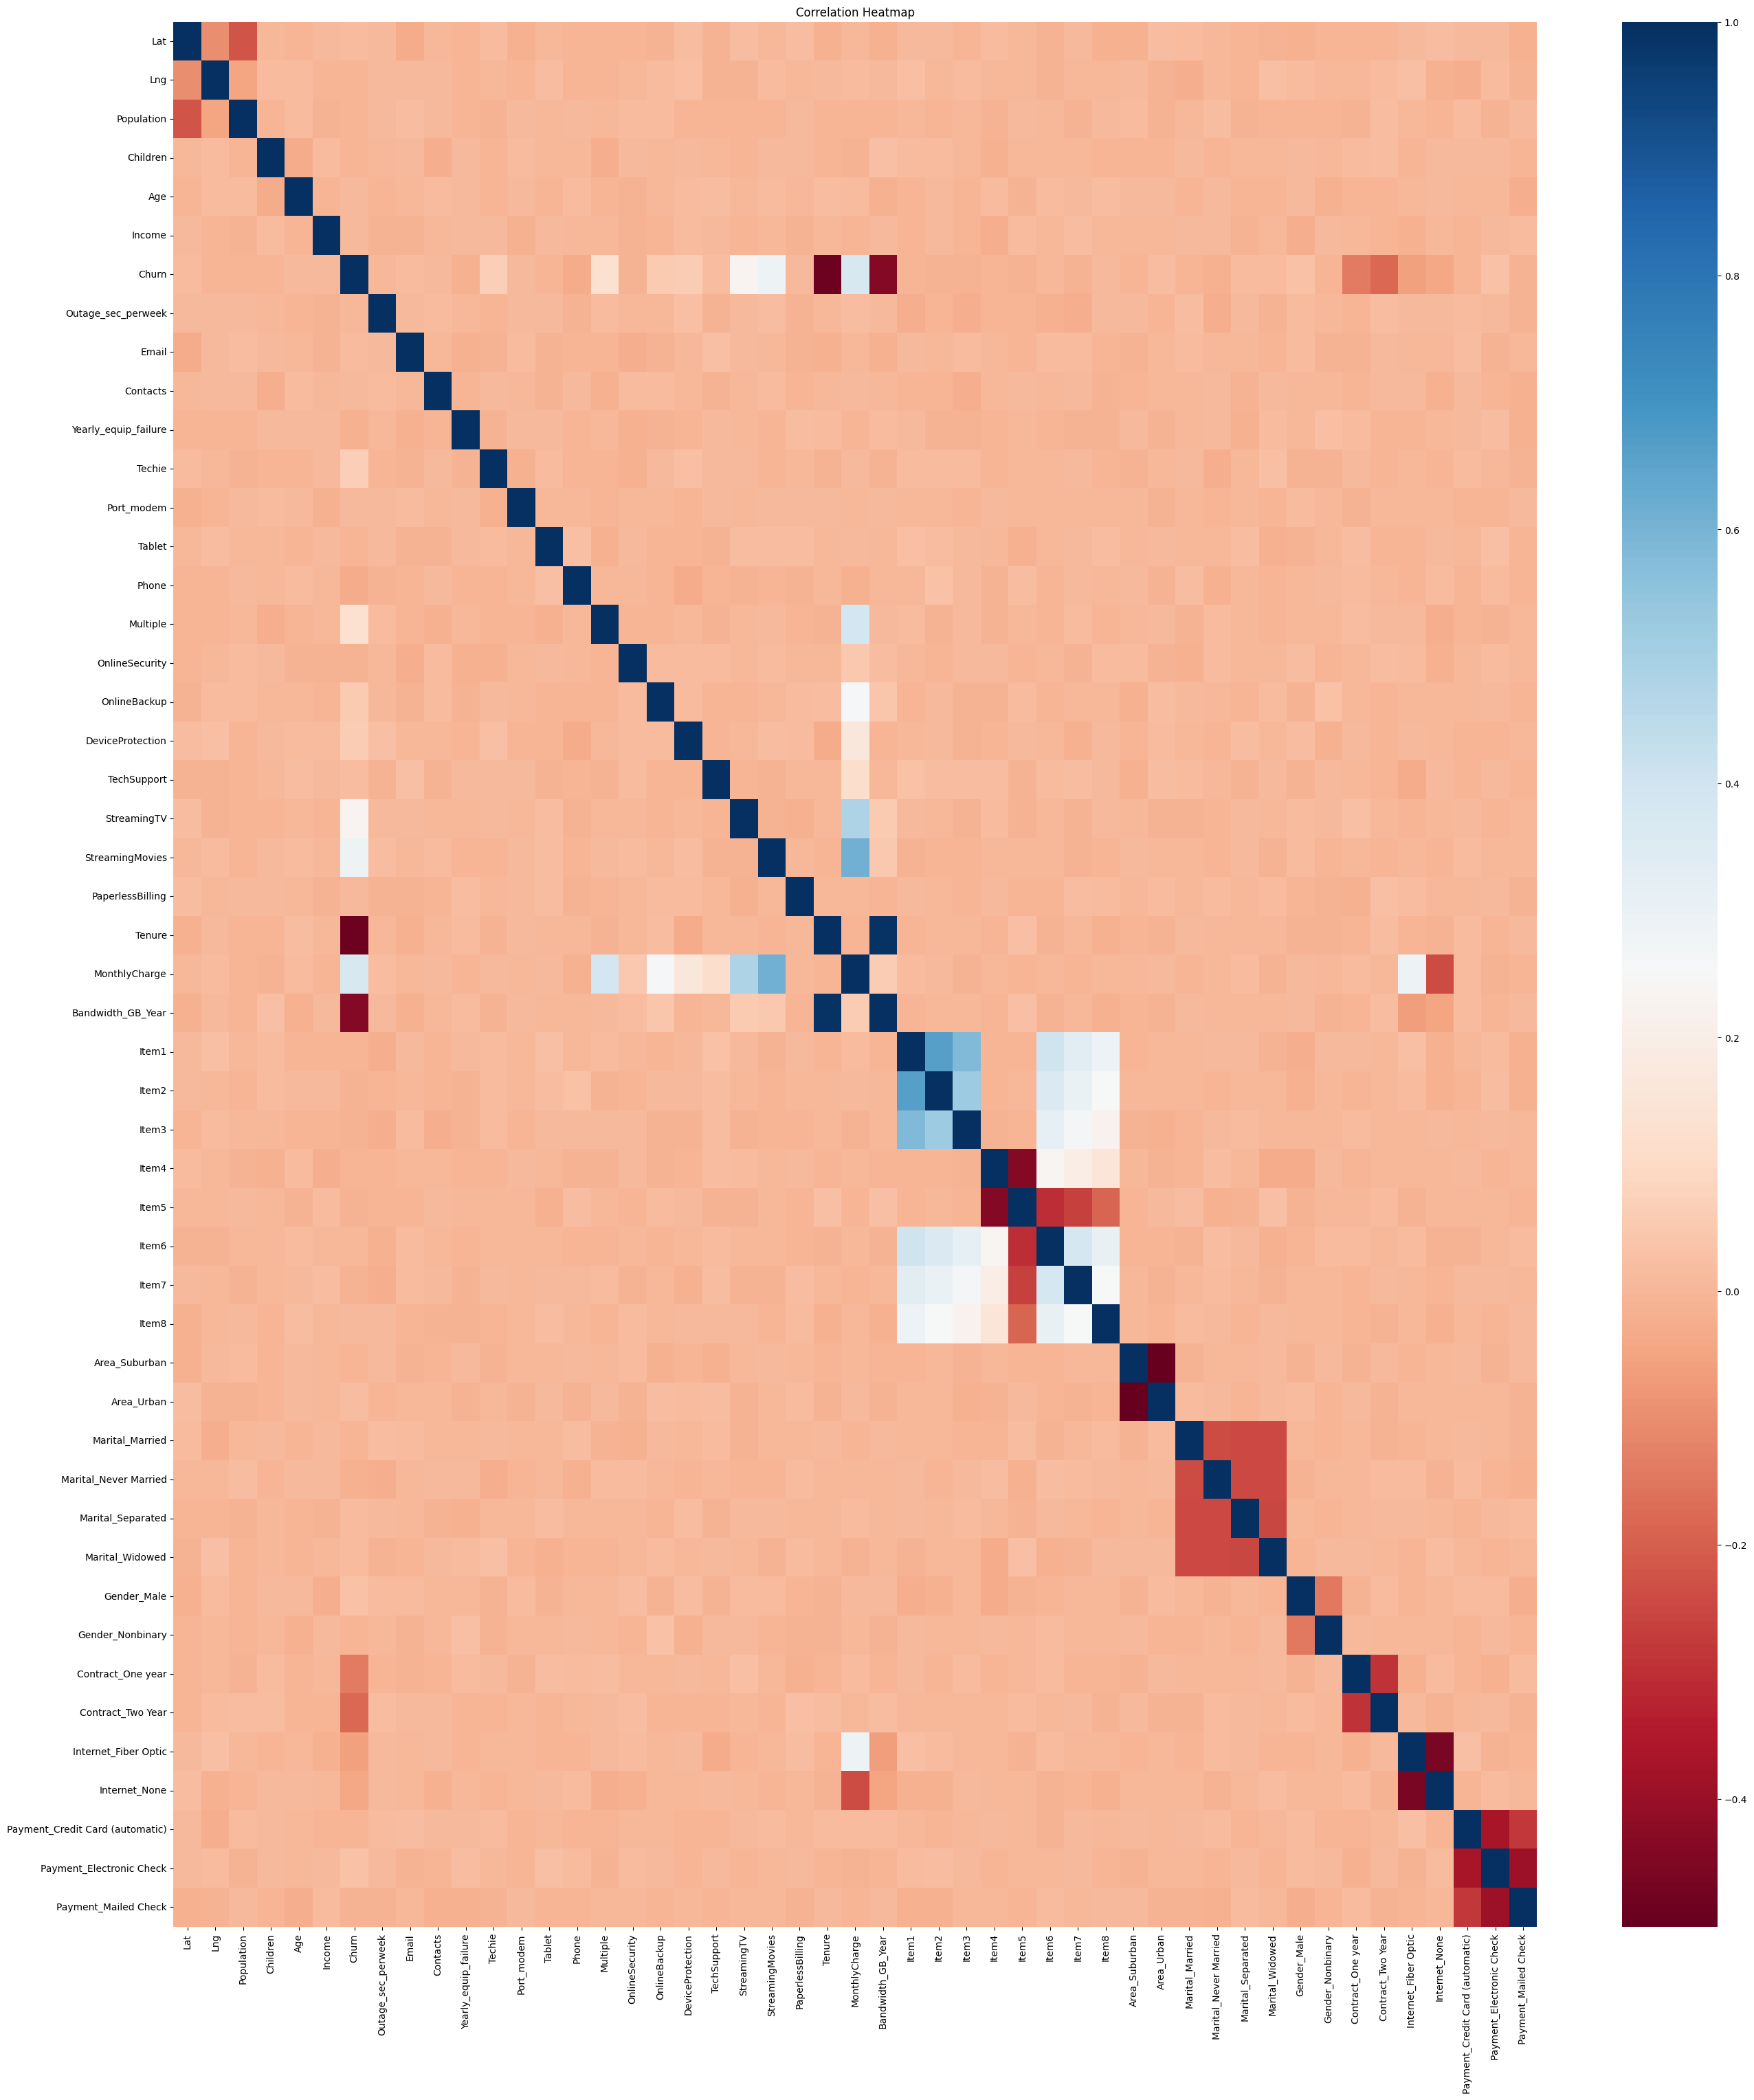

In [220]:
### import seaborn as sns #boxplots, heatmap
import matplotlib.pyplot as plt #figures, subplots

#check for Correlation
plt.subplots(figsize=(32,36))
sns.heatmap(df.corr(),annot=False, cmap='RdBu')
plt.title('Correlation Heatmap')
plt.xticks(rotation=90)
#tenure and bandwidth gb per year high positive correlation
#lng and zip high negative correlation

In [221]:
#separate X, y
y = df['MonthlyCharge']
X = df.drop(['MonthlyCharge'], axis = 1)

<Axes: >

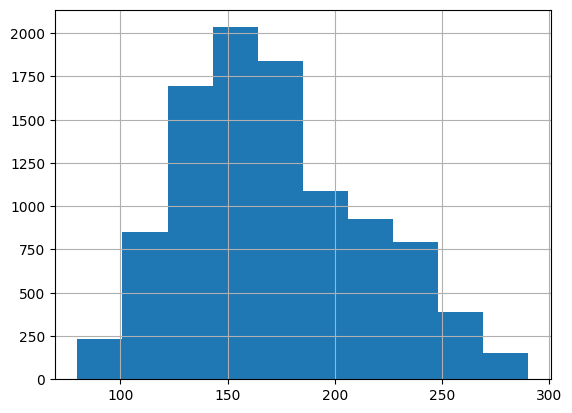

In [222]:
#visualize dependent variable (monthly Charge) distribution
y.hist() #fairly standard distribution bell curve peaking at 150


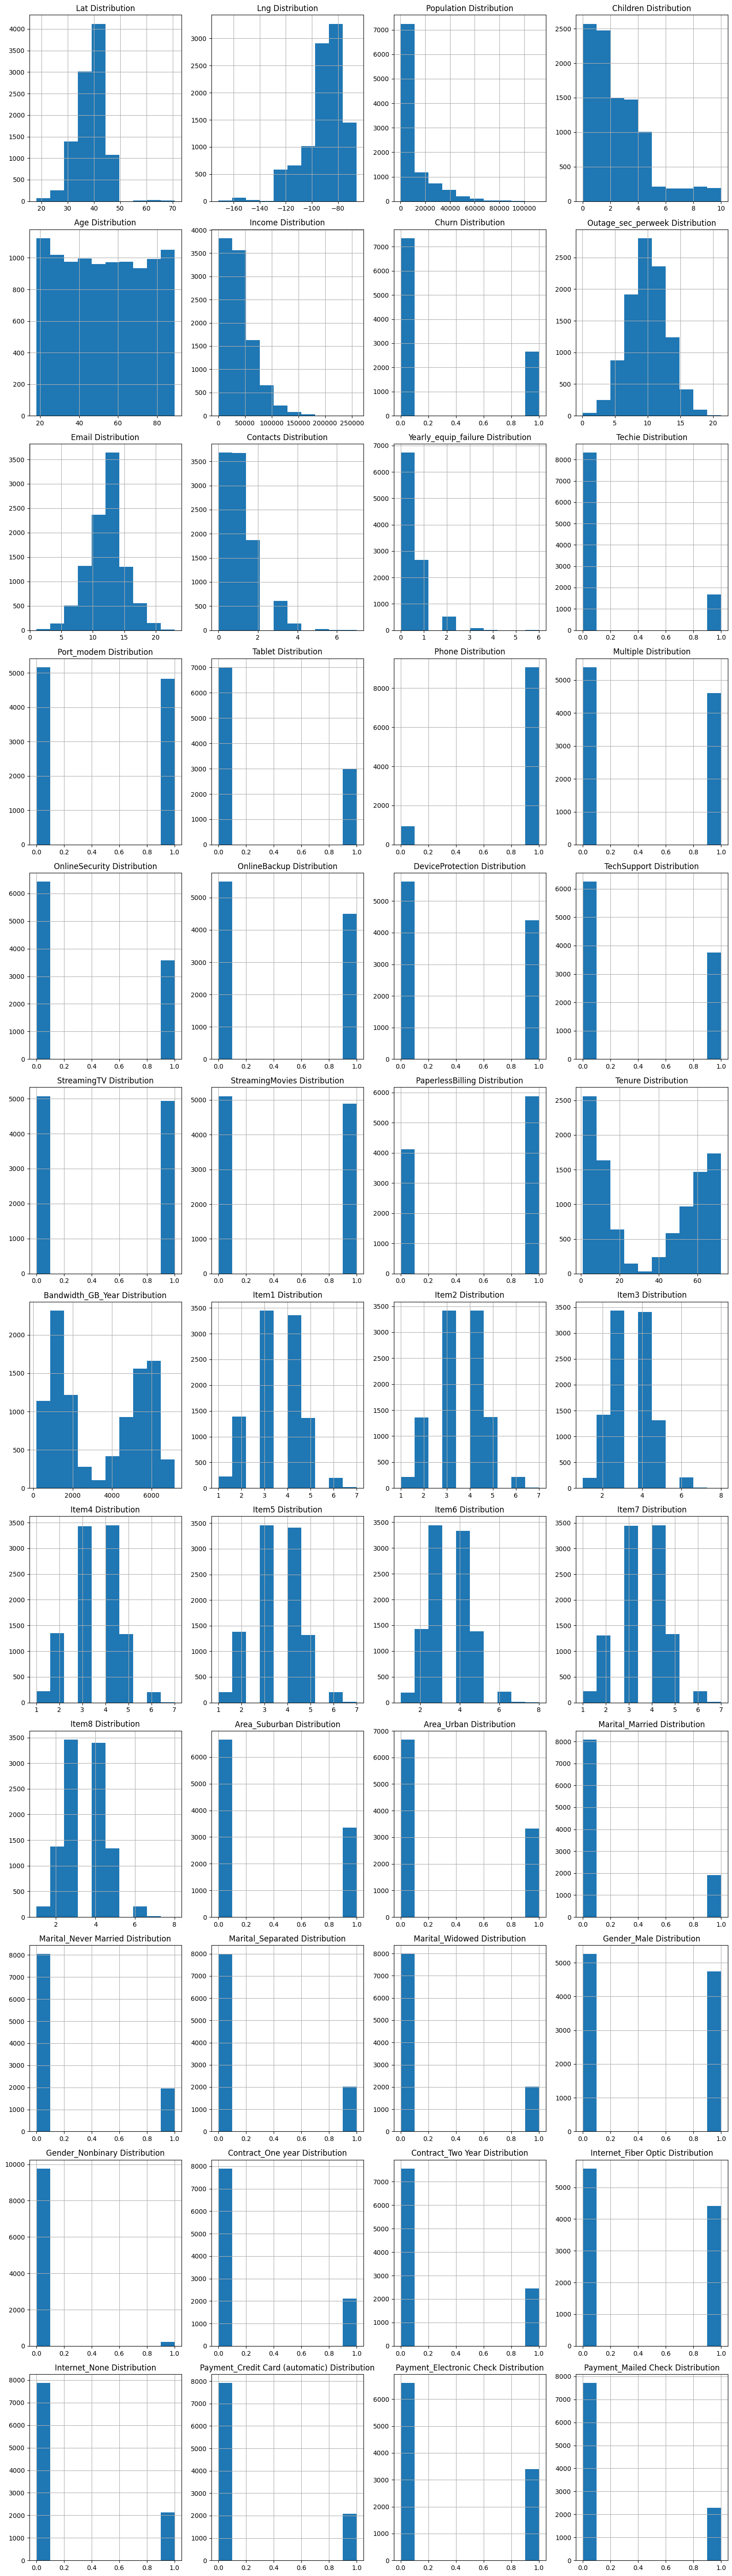

In [223]:
#visualize IV distributions
plt.figure(figsize=(16,56))

for i,col in enumerate(X.columns.tolist()):    
    plt.subplot(12,4,i + 1)
    df[col].hist()
    plt.title(col+" Distribution")
plt.tight_layout()

plt.show()

# Feature Selection
- SelectKBest: Feature selection method used to select the top 'k' features based on a scoring function
- f_regression: Univariate linear regression test returning the p-value for each feature

In [31]:
from sklearn.feature_selection import SelectKBest, f_regression #feature select, pvalues for regression

#instantiate Kbest
skbest = SelectKBest(score_func=f_regression, k='all')

In [32]:
#fit kbest
skbest.fit_transform(X,y)

array([[ 5.6251000e+01, -1.3337571e+02,  3.8000000e+01, ...,
         1.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 4.4328930e+01, -8.4240800e+01,  1.0446000e+04, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 4.5355890e+01, -1.2324657e+02,  3.7350000e+03, ...,
         1.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       ...,
       [ 3.5520390e+01, -1.0044180e+02,  4.0600000e+02, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 3.3580160e+01, -8.5132410e+01,  3.5575000e+04, ...,
         1.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 3.4707830e+01, -8.3536480e+01,  1.2230000e+04, ...,
         0.0000000e+00,  1.0000000e+00,  0.0000000e+00]])

##### p-value: How likely the data could have occurred under the null hypothesis
- Each feature has a hypothesis test
   - **Null Hypothesis:** The feature does not affect the `Monthly Charge`
   - **Alternate Hypothesis:** The feature does affect the `Monthly Charge`
- Any feature that has a p-value less than .05 is statistically significant, and we conclude that the feature does affect the `Monthly Charge`

In [33]:
#build dataframe and print results
pvalues = pd.DataFrame({'Feature':X.columns, 'p_value':skbest.pvalues_})
pvalues.round(5).sort_values('p_value')

,Feature,p_value
18,DeviceProtection,0.00000
24,Bandwidth_GB_Year,0.00000
43,Internet_Fiber Optic,0.00000
21,StreamingMovies,0.00000
6,Churn,0.00000
20,StreamingTV,0.00000
19,TechSupport,0.00000
17,OnlineBackup,0.00000
44,Internet_None,0.00000
16,OnlineSecurity,0.00000


In [224]:
#drop insignificant variables (p > .05 ) based on kbest 
X = X.drop(['Phone','Contract_One year','Payment_Credit Card (automatic)','Lng','Marital_Separated','Age','Payment_Electronic Check','Marital_Widowed','Children','Item1','Gender_Male','Item3','Tablet','Techie','Yearly_equip_failure','Marital_Married','Item7','Item5','Population','Area_Urban','Contacts','Item2','Tenure','Income','Item6','Payment_Mailed Check','Area_Suburban','Contract_Two Year','Item8','Email','Gender_Nonbinary','Lat','PaperlessBilling','Marital_Never Married','Item4','Port_modem'], axis = 1)
#automatically gets rid of our mutlicollinearity issues

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0.5, 0, 'Churn'),
  Text(1.5, 0, 'Outage_sec_perweek'),
  Text(2.5, 0, 'Multiple'),
  Text(3.5, 0, 'OnlineSecurity'),
  Text(4.5, 0, 'OnlineBackup'),
  Text(5.5, 0, 'DeviceProtection'),
  Text(6.5, 0, 'TechSupport'),
  Text(7.5, 0, 'StreamingTV'),
  Text(8.5, 0, 'StreamingMovies'),
  Text(9.5, 0, 'Bandwidth_GB_Year'),
  Text(10.5, 0, 'Internet_Fiber Optic'),
  Text(11.5, 0, 'Internet_None')])

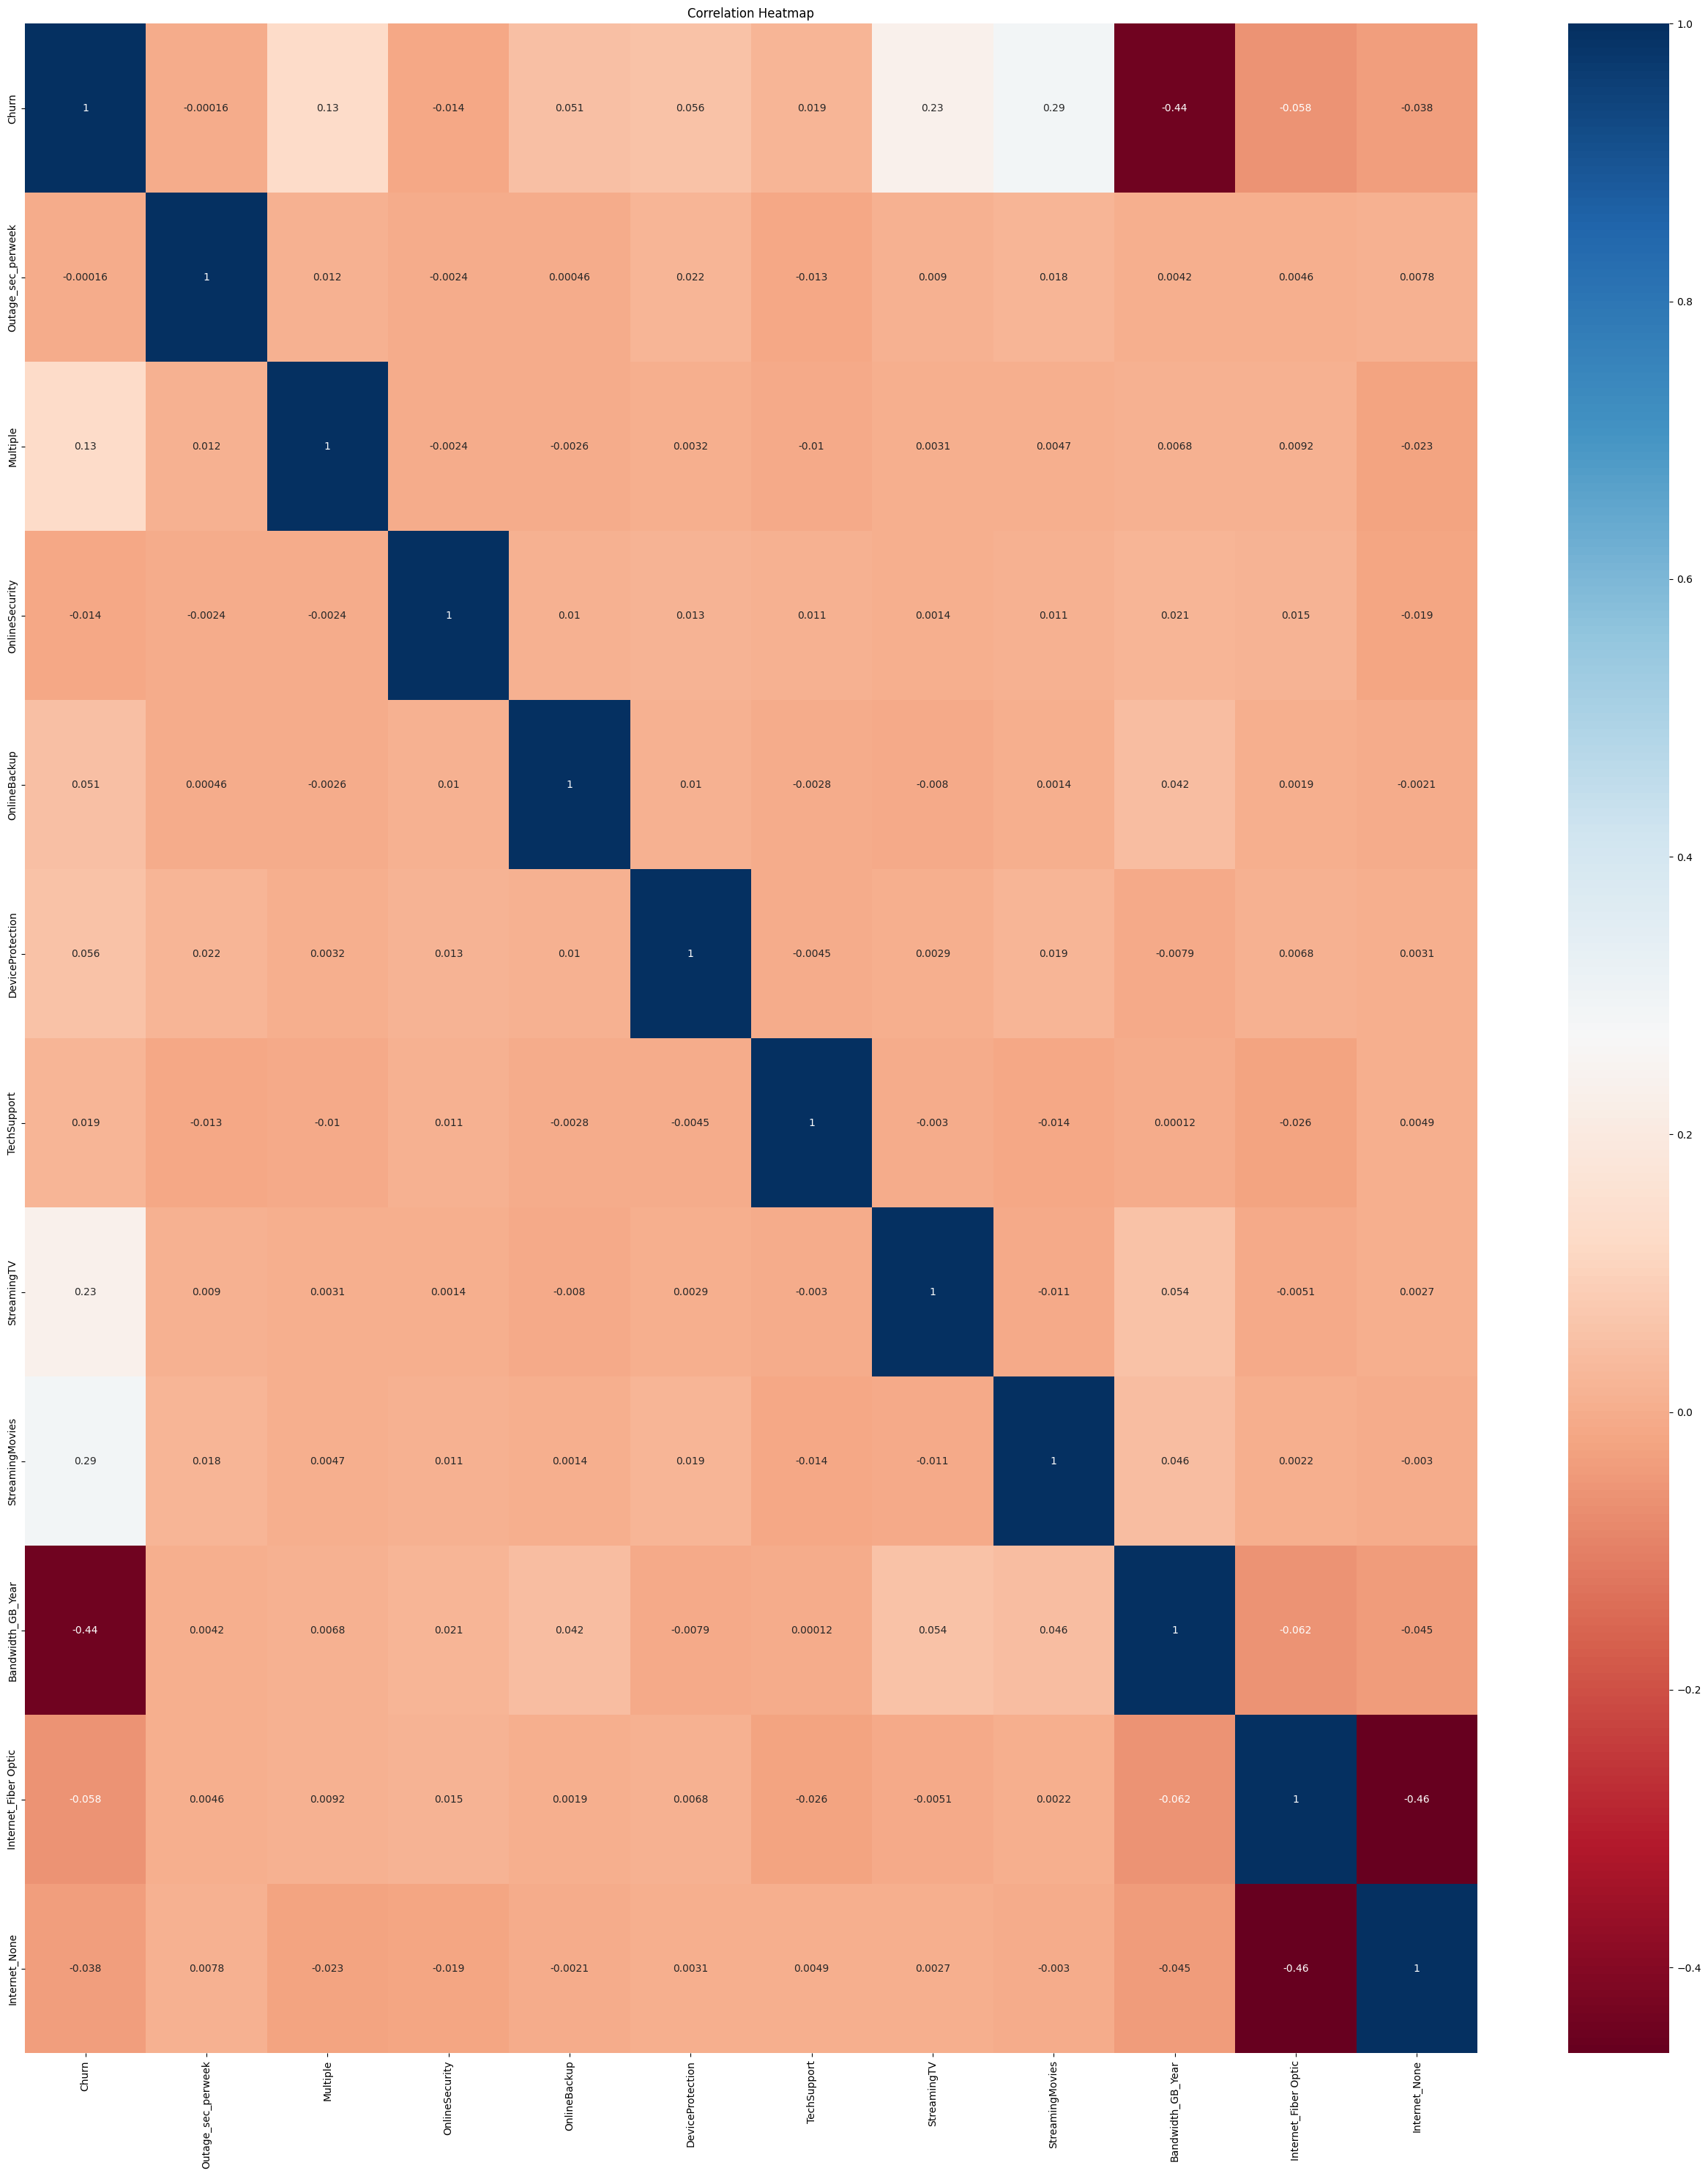

In [225]:
plt.subplots(figsize=(32,36))
sns.heatmap(X.corr(),annot=True, cmap='RdBu')
plt.title('Correlation Heatmap')
plt.xticks(rotation=90)

In [226]:
from sklearn.model_selection import train_test_split #split data

#split data into cross validation and holdout sets
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.2, random_state=0)

In [227]:
print(X_train.shape)
print(X_test.shape) 

(8000, 12)
(2000, 12)


# Part 2

In [228]:
from sklearn.ensemble import RandomForestRegressor #random forest model

#instantiate model
rf = RandomForestRegressor(random_state=0)

- **GridSearchCV:** Automates the process of evaluating different hyperparameter combinations and selecting the best one based on a specified scoring metric
- **n_estimators:** Helps set up a grid search to find the best value
    - Refers to the number of trees in the Random Forest
- **estimator:** The model that is being tuned
    - rf: An instance of a Random Forest model
- **param_grid:** The parameter grid to search
- **cv:** The number of cross validation folds
    - The data will be split into 3 parts and the model will be trained and evaluated 3 times, each time using a different part as the validation set

<img src="CrossValidation.png" width="500"/>

- **Scoring:** The scoring metric to evaluate model performance
- **n_jobs:** The number of jobs to run in parallel
    - -1 means using all available processors
- **Verbose:** The verbosity level which controls how much information is printed during the execution
    - 2 provides a detailed output
- **Return_train_score:** Whether to include training scores in the results

#### Mean Squared Error
- Calculated as the average of the squared differences between the predicted and actual values
- neg_mean_squared_error is being used here because GridSearchCV maximizes the score, and since the lower the better, negating it turns it into a score that can be maximized.

In [229]:
from sklearn.model_selection import GridSearchCV #cross validation, hyperparameter tuning

#identify params to test n_estimators only
params = {'n_estimators': [10, 25, 100, 250, 500],
         }

#instantiate the grid search to find best 'n_estimators'
grid_search = GridSearchCV(estimator = rf, param_grid = params, 
                          cv = 3, scoring = 'neg_mean_squared_error', n_jobs = -1, verbose = 2, return_train_score=True)

#fit the model
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'n_estimators': [10, 25, 100, 250, 500]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

## Complexity Curve:
- Helps understand how different values of a hyperparameter affect the performance of a model
- The left graph belows shows us that the number of estimators start to have diminishing returns around 100-200 (meaning that it stops improving after this point)
- The right graph shows that the time of execution increases significantly over the number of estimators
- Our final pipeline and hyperparameters will be between 100-200 estimators

Text(0.5, 1.0, 'Training Time vs n_estimators')

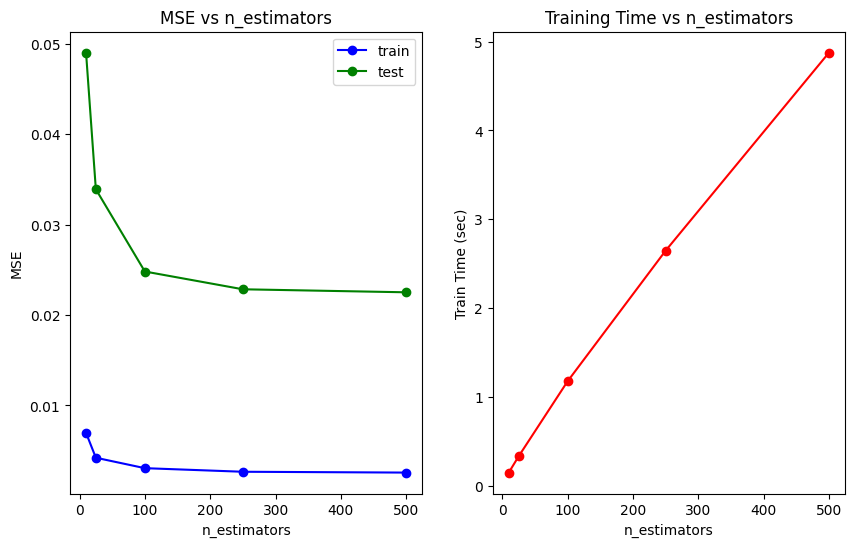

In [230]:
#build plot and subplots

# sets up a grid 1x2 figures
plt.subplots(1, 2, figsize=(10, 6))
# 1 row, 2 columns, 1st subplot
plt.subplot(121) 
# plot the number of estimators and the mse scores for training and testing data
plt.plot(list(grid_search.cv_results_['param_n_estimators']), -grid_search.cv_results_['mean_train_score'], 'bo-', label = 'train') #bo: Blue circles with a line
plt.plot(list(grid_search.cv_results_['param_n_estimators']), -grid_search.cv_results_['mean_test_score'], 'go-', label = 'test') #go: Green circles with a line
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.title('MSE vs n_estimators')

# 1 row, 2 columns, 2nd subplot
plt.subplot(122)
plt.plot(grid_search.cv_results_['param_n_estimators'], grid_search.cv_results_['mean_fit_time'], 'ro-') #ro: Red circles with a line
plt.xlabel('n_estimators')
plt.ylabel('Train Time (sec)')
plt.title('Training Time vs n_estimators')

In [231]:
#identify params to test max features only
params2 = {'max_features': [1, 3, 5, 7, 9, 11, 12],
         }

#instantiate the grid search to find best 'max features'
grid_search2 = GridSearchCV(estimator = rf, param_grid = params2, 
                          cv = 3, scoring = 'neg_mean_squared_error', n_jobs = -1, verbose = 2, return_train_score=True)

#fit the model
grid_search2.fit(X_train, y_train)


Fitting 3 folds for each of 7 candidates, totalling 21 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_features': [1, 3, 5, 7, 9, 11, 12]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

### Create a complexity curve to visualize the best number of max features
- The max features start to have diminishing returns after using 7 features (started with 12)
    - This makes sense as we don't want to overfit our model
- Looking at the graph, we can see that the final model will have 5, 7, or 9 max features.


Text(0.5, 1.0, 'Training Time vs max_features')

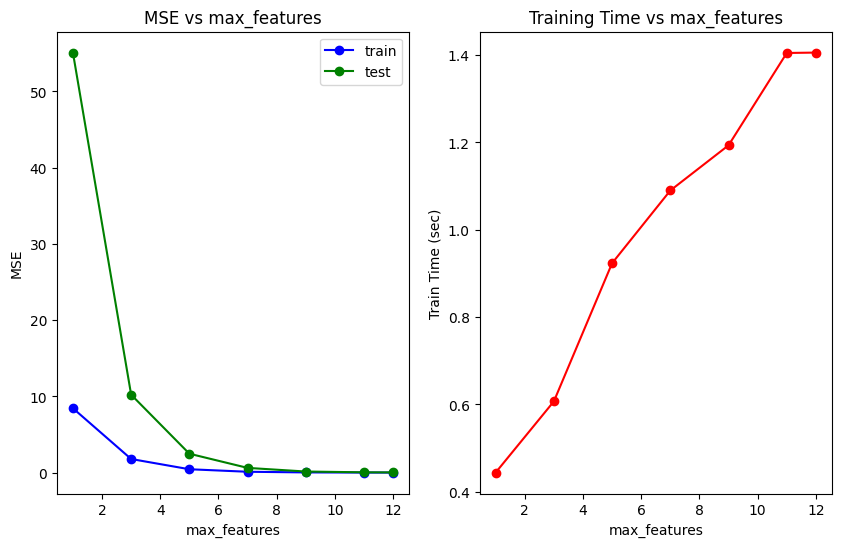

In [232]:
#build plot and subplots
plt.subplots(1, 2, figsize=(10, 6))
plt.subplot(121)
plt.plot(list(grid_search2.cv_results_['param_max_features']), -grid_search2.cv_results_['mean_train_score'], 'bo-', label = 'train')
plt.plot(list(grid_search2.cv_results_['param_max_features']), -grid_search2.cv_results_['mean_test_score'], 'go-', label = 'test')
plt.legend()
plt.xlabel('max_features')
plt.ylabel('MSE')
plt.title('MSE vs max_features')
    
plt.subplot(122)
plt.plot(grid_search2.cv_results_['param_max_features'], grid_search2.cv_results_['mean_fit_time'], 'ro-')
plt.xlabel('max_features')
plt.ylabel('Train Time (sec)')
plt.title('Training Time vs max_features')

### Model Pipeline
- 'Imputation': Represents the step of the pipeline
- SimpleImputer: Handles missing values in the dataset using the median
- rfr: Represents the next step of the pipeline using a RandomForestRegressor model

In [233]:
from sklearn.impute import SimpleImputer #missingness imputation in pipeline

####now build pipeline to find best combined hyperparameters and perform cross validation after pipeline preprocessing is done

#Build pipeline and cross validate N_numbers w/ hyperparameter tuning
steps = [('imputation', SimpleImputer(strategy='median')),
         ('rfr', RandomForestRegressor(random_state=0))]


### Setting up the Pipeline
- The Pipeline package is used to chain mutliple steps in a machine learning workflow, ensuring that the sequence of operations is applied consistently
- Here, we can also specify the parameters that we'll use for the pipeline, by using our discoveries from the complexity curves
- max_depth: Specifies the maximum number of levels that each tree in the forest can grow
    - If the max_depth is too shallow, it might not capture the complexities of the data, which can result in underfitting
    - If the max_depth is too deep, the model can capture more patterns in the data but it could lead to overfitting where it may capture the noise
    - A good max_depth value is usually between 10 and 30

In [234]:
from sklearn.pipeline import Pipeline #assemble steps

#instantiate pipeline
pipeline = Pipeline(steps)

#combined hyperparams
params = {'rfr__n_estimators': [100, 150, 200],
          'rfr__max_features': [5, 7, 9],
          'rfr__max_depth': [8, 10, 12]
         }

### Run the Pipeline
- Instantiate the gridsearch with the pipeline steps we defined earlier
- param_grid: A dictionary specifying the hyperparameters that we want to tune and the range of each value
- Scoring: Since the GridSearchCV function maximizes 

In [235]:
#Instantiate gridsearch with arguments that will
#perform cross validation on whatever the pipeline is fit to, 
#with a gridsearch for optimal parameters.  
cv = GridSearchCV(pipeline, param_grid=params, cv = 3, scoring = 'neg_mean_squared_error', n_jobs = -1, verbose = 2, return_train_score=True)

#apply the grid search cross validation to training set
cv.fit(X_train, y_train) #81 fits to process


Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('imputation',
                                        SimpleImputer(strategy='median')),
                                       ('rfr',
                                        RandomForestRegressor(random_state=0))]),
             n_jobs=-1,
             param_grid={'rfr__max_depth': [8, 10, 12],
                         'rfr__max_features': [5, 7, 9],
                         'rfr__n_estimators': [100, 150, 200]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

### Scores from the GridSearchCV Pipeline

In [236]:
#best parameters
cv.best_params_

{'rfr__max_depth': 12, 'rfr__max_features': 9, 'rfr__n_estimators': 200}

In [237]:
#view results
cv.cv_results_

{'mean_fit_time': array([0.60436082, 0.92781313, 1.35145259, 0.78455448, 1.22017241,
        1.69429898, 1.12263918, 1.55190825, 1.99650653, 0.82373158,
        1.18631442, 1.62621403, 1.09053787, 1.49821623, 1.99440742,
        1.29444202, 1.78110091, 2.44084525, 1.0683349 , 1.46342945,
        1.97136108, 1.13536763, 1.61611136, 2.17645065, 1.3695457 ,
        1.7400469 , 2.01144115]),
 'std_fit_time': array([0.01556659, 0.02327074, 0.12475974, 0.00697235, 0.09445761,
        0.11338684, 0.03341532, 0.17317536, 0.09835426, 0.05616689,
        0.02668205, 0.04173289, 0.08864195, 0.08111616, 0.08096063,
        0.12264068, 0.04737438, 0.11804962, 0.10364167, 0.12903074,
        0.16209963, 0.09270474, 0.02915023, 0.03668856, 0.07056085,
        0.06327721, 0.06664234]),
 'mean_score_time': array([0.0305655 , 0.04808084, 0.0622716 , 0.03139687, 0.04696194,
        0.06109715, 0.03225724, 0.05542445, 0.06024059, 0.040205  ,
        0.05844227, 0.07796923, 0.04015319, 0.0574228 , 0.074995

**Best test score**
- Because the neg_mean_squared_error was used, we negate it to convert it back to the regular mean squared error

In [238]:
-cv.best_score_

0.12081062164790257

### Predict using the model

$r^2$: Coefficient of determination - Represents how well the model predicts the outcome of the dependent variable 
- Closer to 1, the better

In [139]:
y_train_pred = cv.predict(X_train)
y_pred = cv.predict(X_test)

#r2 train
r2_score(y_train,y_train_pred)

0.9999947376568143

In [140]:
#r2 test
r2_score(y_test,y_pred)

0.9999744026941625

In [142]:
#best parameters
cv.best_params_

{'rfr__max_depth': 12, 'rfr__max_features': 9, 'rfr__n_estimators': 200}

### Review Features
- Create new model with best parameters from model pipeline
- 200 represents the number of trees in the forest
- 9 represents the maximum number of features to consider when looking for the best split
- 12 represents the maximum depth of the tree where it will be expanded until all leaves are pure
- **model.feature_importances_:** Provides the importance of each feature in the prediction

In [240]:
# now review features that were most predictive
rfnew = RandomForestRegressor(n_estimators=200, max_features=9, max_depth=12,random_state=0)
model = rfnew.fit(X, y)
importances = list(model.feature_importances_)
# Creates a list from the columns
X_list = list(X.columns)
# Pairs the feature to the importance and rounds the importance value to 2 decimal places
X_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_list, importances)]
# lambda x: x[1] takes a tuple/pair as input and returns the second element of the pair (importance score) 
# reverse = True is sorting by descending order
X_importances = sorted(X_importances, key = lambda x: x[1], reverse = True)
# {:20}.format(*pair) formats the output to be left aligned with a 20 character space in between
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in X_importances]

Variable: StreamingMovies      Importance: 0.38
Variable: StreamingTV          Importance: 0.27
Variable: Multiple             Importance: 0.14
Variable: Internet_Fiber Optic Importance: 0.08
Variable: OnlineBackup         Importance: 0.07
Variable: DeviceProtection     Importance: 0.02
Variable: TechSupport          Importance: 0.02
Variable: Churn                Importance: 0.01
Variable: Internet_None        Importance: 0.01
Variable: Outage_sec_perweek   Importance: 0.0
Variable: OnlineSecurity       Importance: 0.0
Variable: Bandwidth_GB_Year    Importance: 0.0


[None, None, None, None, None, None, None, None, None, None, None, None]

# Results
- The results of the model show a very low MSE value for both test and training data, meaning that our model is performing well.
- Both $r^2$ of the test and training data are at .99, which is another indication that the model is fitting the data very well.
- Using SelectKBest for feature selection helped minimize the MSE values since it was able to identify the significant variables, reducing the amount of noise in the dataset.

### Research Question:
Can the business predict monthly charges for telecommunication customers?

# Conclusion
Yes, the business can predict monthly charges for telecommunication customers. However, more data will help improve the model and decrease biases or noise in the dataset.
- In the future, more tuning can be performed on the hyperparameters to potentially improve the model
- 
**Importances:**
  - Looking at the importances output, we can identify that `Outage_sec_perweek`, `OnlineSecurity`, and `Bandwidth_GB_Year` have little to no importance in the model predictions.
  - We can identify that `StreamingMovies` and `StreamingTV` were the top 2 important features, which could help the company focus more on streaming services to potentially increase their profits.